# **What Effect Does Screen Time Have on Mental Health?**

#### Fall 2025 Data Science Project


#### An Analysis By Nicole Kyei-Asare, Olusayo Olujide, Felix Ogordi, Brayden Awuku, Uwamusi Ewanehi, and Bryan Wetie

## **Table of Contents:**
1.   Contributions From Group Members
2.   Introduction
3.   Data Curation
4.   Exploratory Data Analysis
5.   Primary Analysis
6.   Visualization
7.   Insights and Conclusions








## **1.   Contributions From Group Members**




**Nicole Kyei-Asare**: Worked on introduction and the 2nd conclusion in the Exploratory Data Analysis section.

**Olusayo Olujide**: Worked on Visualization along with Insights and Conclusion. Created plots 2 and 3 which helped to better provide insights to our main question.

**Felix Ogordi**: Worked on the 1st conclusion in the Exploratory Data Analysis section and completed the Data Curation section.

**Brayden Awuku**: Worked on the primary analysis, visualization, alongside with writing up insights and conclusions.

**Uwamusi Ewanehi**: Worked on the Introduction and the 3rd Conclusion in the Exploratory Data Analysis section.

**Bryan Wetie**: Worked mainly on the primary analysis part, which reveals general trend where increased screen time is associated with lower mental well-being scores.


## **2.   Introduction**


As technology continues to improve and society becomes more reliant on it through things like ChatGPT and numerous social media apps, it is important to recognize the way that it is affecting people. While some may focus their efforts on the impact that this increase in technology has on society as a whole, we recognize the importance of seeing its effects on an individual level.

As a team we chose to investigate the effects that screen time has on mental wellness. This is a relevant topic because as the use of screen time continues to grow whether as a result of the type of work someone does or  social media apps usage, it is important to know the effects that this may have on one’s mental wellness. Our team aims to answer with our analysis whether there is significant correlation between the amount of screen time one has and their mental health. Moreover, we also would like our analysis to take into account other factors that may include one’s mental wellness which may include occupation, sleep quality, stress levels, etc. Using gathered data we aim to create a regression model that can be used to predict someone’s mental wellness rating based on various lifestyle choices that they make. Answering these questions are important because they help people better understand the effects that their screen time and other lifestyle choices may have on their mental health. In understanding the effects of screen time, it can also help people make the necessary choices in order to improve their mental health.


## **3.   Data Curation**


The first step in our data curation process is adding the necessary imports for processing and cleaning the data we will using.

In [31]:
# Adding Necessary Imports
import pandas as pd
import string
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Next we will be loading in the ScreenTime vs MentalWellness.csv into a dataframe where it can be processed and perform feature engineering.

In [32]:
data = pd.read_csv('ScreenTime vs MentalWellness.csv')
data

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3,NaN
396,U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5,NaN
397,U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6,NaN
398,U0399,29,Female,Retired,Hybrid,5.04,0.94,4.10,7.32,1,7.1,63.6,97,12.1,21.0,NaN


The user id and Unamed columns will be dropped since these aren't needed for our analysis.

In [33]:
data = data.drop(columns=['user_id', 'Unnamed: 15'], errors='ignore')
data

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3
396,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5
397,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6
398,29,Female,Retired,Hybrid,5.04,0.94,4.10,7.32,1,7.1,63.6,97,12.1,21.0


Since our main feautre screen_time_hours, is equal to work_screen_hours + leisure_screen_hours we want to remove work_screen_hours and leisure_screen_hours for redundancy.

In [34]:
data = data.drop(columns=['work_screen_hours', 'leisure_screen_hours'])
data

,age,gender,occupation,work_mode,screen_time_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,33,Female,Employed,Remote,10.79,6.63,1,9.3,44.7,127,0.7,9.3
1,28,Female,Employed,In-person,7.40,8.05,3,5.7,78.0,74,2.1,56.2
2,35,Female,Employed,Hybrid,9.78,6.48,1,9.1,51.8,67,8.0,3.6
3,42,Male,Employed,Hybrid,11.13,6.89,1,10.0,37.0,0,5.7,0.0
4,28,Male,Student,Remote,13.22,5.79,1,10.0,38.5,143,10.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,26,Female,Student,Remote,6.43,7.75,1,5.9,64.6,252,7.6,39.3
396,16,Male,Self-employed,Remote,9.59,5.57,1,10.0,47.4,99,7.0,3.5
397,40,Male,Student,Remote,8.72,7.56,1,9.4,57.3,193,10.1,6.6
398,29,Female,Retired,Hybrid,5.04,7.32,1,7.1,63.6,97,12.1,21.0


Now we have several columns that are categorigal, occupation, gender, and work_mode. To train our model we will turn this data into numbers by applying One-Hot Encoding.

In [35]:
categorical_cols = ['gender', 'occupation', 'work_mode']
data_curated = pd.get_dummies(data, columns=['gender', 'occupation', 'work_mode'])
data_curated

,age,screen_time_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,gender_Female,gender_Male,gender_Non-binary/Other,occupation_Employed,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_Hybrid,work_mode_In-person,work_mode_Remote
0,33,10.79,6.63,1,9.3,44.7,127,0.7,9.3,True,False,False,True,False,False,False,False,False,False,True
1,28,7.40,8.05,3,5.7,78.0,74,2.1,56.2,True,False,False,True,False,False,False,False,False,True,False
2,35,9.78,6.48,1,9.1,51.8,67,8.0,3.6,True,False,False,True,False,False,False,False,True,False,False
3,42,11.13,6.89,1,10.0,37.0,0,5.7,0.0,False,True,False,True,False,False,False,False,True,False,False
4,28,13.22,5.79,1,10.0,38.5,143,10.1,0.0,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26,6.43,7.75,1,5.9,64.6,252,7.6,39.3,True,False,False,False,False,False,True,False,False,False,True
396,16,9.59,5.57,1,10.0,47.4,99,7.0,3.5,False,True,False,False,False,True,False,False,False,False,True
397,40,8.72,7.56,1,9.4,57.3,193,10.1,6.6,False,True,False,False,False,False,True,False,False,False,True
398,29,5.04,7.32,1,7.1,63.6,97,12.1,21.0,True,False,False,False,True,False,False,False,True,False,False


## **4.   Exploratory data Analysis**


In [36]:
missingVals = data.isnull().sum()
print('Number of Missing Values: ', missingVals)

Number of Missing Values:  age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64


Here is the number of rows and columns in our data

In [37]:
data.shape

(400, 12)

Our data's data types:

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          400 non-null    int64  
 1   gender                       400 non-null    object 
 2   occupation                   400 non-null    object 
 3   work_mode                    400 non-null    object 
 4   screen_time_hours            400 non-null    float64
 5   sleep_hours                  400 non-null    float64
 6   sleep_quality_1_5            400 non-null    int64  
 7   stress_level_0_10            400 non-null    float64
 8   productivity_0_100           400 non-null    float64
 9   exercise_minutes_per_week    400 non-null    int64  
 10  social_hours_per_week        400 non-null    float64
 11  mental_wellness_index_0_100  400 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 37.6+ KB


Data summary: The dataset consists of 400 entries (users) and 15 features. All features are present, with no missing values. The data is a mix of categorical and numerical variables. In our data the main independent variable is screen_time_hours which is a sum of work_screen_hours and leisure_screen_hours.

### **Our Key Variables:**

In [39]:
key_vars = ['screen_time_hours', 'mental_wellness_index_0_100', 'sleep_hours', 'stress_level_0_10', 'productivity_0_100']
print("\nDescriptive Statistics for Key Variables:")
print(data[key_vars].describe().round(2))


Descriptive Statistics for Key Variables:
       screen_time_hours  mental_wellness_index_0_100  sleep_hours  \
count             400.00                       400.00       400.00   
mean                9.02                        20.33         7.01   
std                 2.49                        20.38         0.85   
min                 1.00                         0.00         4.64   
25%                 7.37                         3.68         6.40   
50%                 9.09                        14.80         7.03   
75%                10.50                        30.65         7.64   
max                19.17                        97.00         9.74   

       stress_level_0_10  productivity_0_100  
count             400.00              400.00  
mean                8.15               54.31  
std                 2.09               15.02  
min                 0.00               20.60  
25%                 6.90               43.60  
50%                 8.80               51.75

### **1st Conclusion From Hypothesis Testing**

The first conclusion we would like to present is one of the most important in our analysis. We will determine if there is a significant correlation between screen_time_hours and our indicator of mental health, mental_wellness_index_0_100. To explore this relationship, we calculate the correlation coefficient between these two variables and obtain the p-value by conducting a two tailed hypothesis test to assess the statistical significance of the result.



Our hypotheses are as follows:

**Null Hypothesis:** There is no linear relationship between total screen time and the mental wellness index

**Alternative Hypothesis:** There is a linear relationship between total screen time and the mental wellness index

We will use a standard significance level ($\alpha$) of $0.05$.



In [40]:
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(data['screen_time_hours'], data['mental_wellness_index_0_100'])

alpha = 0.05

print("Hypothesis Test: Screen Time vs Mental Wellness")
print(f"Correlation Coefficient (r): {correlation:.4f}")
print(f"P-value (Two-tailed): {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")

Hypothesis Test: Screen Time vs Mental Wellness
Correlation Coefficient (r): -0.6359
P-value (Two-tailed): 0.0000
Significance Level (alpha): 0.05


**Our Decision:** Reject the Null Hypothesis (H₀)

We can conclude that there here is a statistically significant correlation between total screen time and mental wellness and since p-value is less than or signifcance level, we reject the null hypothesis.

Below we will like to show the relationship between screen time hours and and the user's mental wellness index:

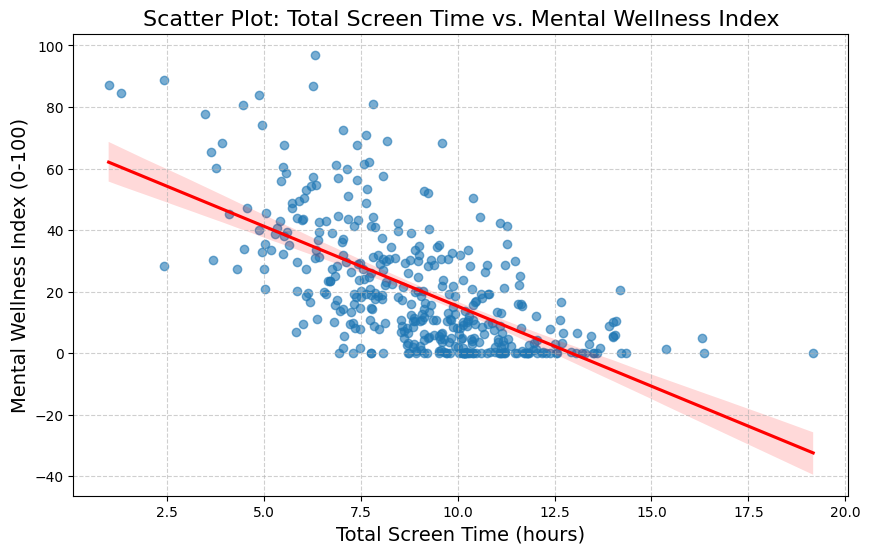

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='screen_time_hours', y='mental_wellness_index_0_100', data=data,
            scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

plt.title('Scatter Plot: Total Screen Time vs. Mental Wellness Index', fontsize=16)
plt.xlabel('Total Screen Time (hours)', fontsize=14)
plt.ylabel('Mental Wellness Index (0-100)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Conclusion:
The correlation coefficient is approximately -0.6359. This indicates a moderately strong negative linear relationship. As total screen time increases, the mental wellness index tends to decrease.The P-value is also $0.0000$, which is much lower than the significance level, $\alpha = 0.05$. Therefore, we reject the null hypothesis ($H_0$). We can conlusde that screen time significantly impacts mental wellness.

### **2nd Conclusion From Hypothesis Testing**


The second thing that we will be investigating is whether occupation has an effect on mental wellness.

The different types of occupations that we will be looking at as gathered from our data is Employed, Student, Self-Employed, Retired, and Unemployed. The mental wellness scale goes from 0 to 100.

To explore whether or not occupation has an effect on mental wellness we will be using a One-Way ANOVA test.

Our hypotheses are as follows:

**Null Hypothesis:** The occupation does not have an effect on mental wellness.

**Alternative Hypothesis:** The occupation does have an effect on mental wellness.

We will use a standard significance level ($\alpha$) of $0.05$.

In [42]:
# ['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
employed_df = data[data['occupation'] == "Employed"]['mental_wellness_index_0_100']
self_employed_df = data[data['occupation'] == "Self-employed"]['mental_wellness_index_0_100']
retired_df = data[data['occupation'] == "Retired"]['mental_wellness_index_0_100']
unemployed_df = data[data['occupation'] == "Unemployed"]['mental_wellness_index_0_100']

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(employed_df, self_employed_df, retired_df, unemployed_df)
alpha = 0.05

print("Hypothesis Test: Occupation vs Mental Wellness")
print(f"F-Statistic (f): {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")



Hypothesis Test: Occupation vs Mental Wellness
F-Statistic (f): 5.5031
P-value: 0.0000
Significance Level (alpha): 0.05


**Our Decision:** Reject the Null Hypothesis (H₀)

Since the p-value is less then the significance level, we choose to reject our null hypothesis. Therefore we conclude that occupation does have a effect on mental wellness.


Below we will like to show the relationship between occupation and and the user's mental wellness index:

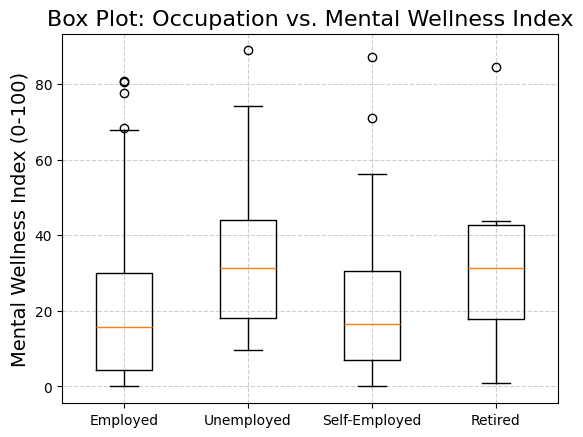

In [43]:
plt.title('Box Plot: Occupation vs. Mental Wellness Index', fontsize=16)
plt.ylabel('Mental Wellness Index (0-100)', fontsize=14)
plt.boxplot([employed_df, unemployed_df, self_employed_df, retired_df], tick_labels=['Employed', 'Unemployed', 'Self-Employed', 'Retired'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### **3rd Conclusion From Hypothesis Testing**

The third thing we will investigate is whether gender has an effect on the occupation. This will let us know what gender is mainly being affected when it comes to the mental wellness based on the occupation.

**Null Hypothesis:** Gender does not affect the occupation

**Alternate Hypothesis:** Gender does affect the occupation

We will use a standard significance level ($\alpha$) of $0.05$.

First we start by creating a contingency table of the gender and occupation variables so that we can visualize the frequency distribution of the variables.

In [44]:
import matplotlib.pyplot as plt

genderOccupation = pd.crosstab(data['gender'], data['occupation'])
print(genderOccupation)

occupation        Employed  Retired  Self-employed  Student  Unemployed
gender                                                                 
Female                 125        6             21       59          11
Male                    79        6             23       46          16
Non-binary/Other         3        2              1        2           0


Next we create histograms of each occupation and the number of people identifying with a specific gender for that occupation

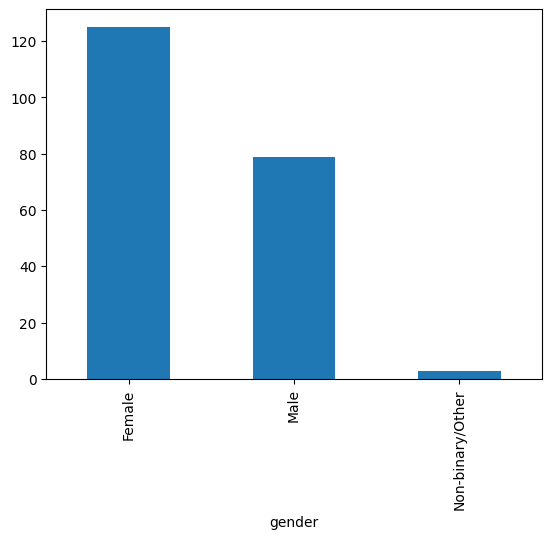

In [45]:
genderOccupation['Employed'].plot.bar()
plt.show()

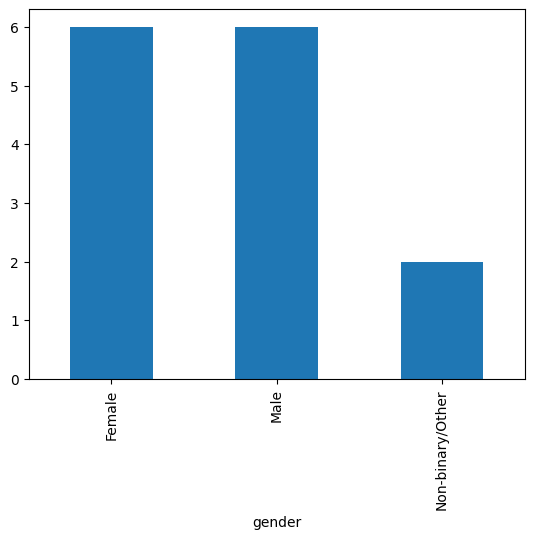

In [46]:
genderOccupation['Retired'].plot.bar()
plt.show()

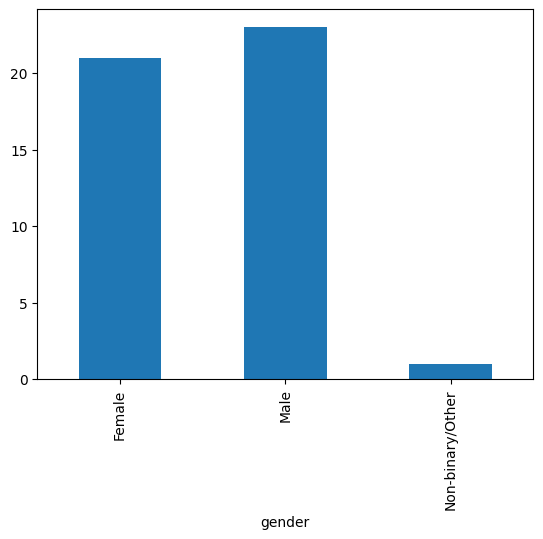

In [47]:
genderOccupation['Self-employed'].plot.bar()
plt.show()

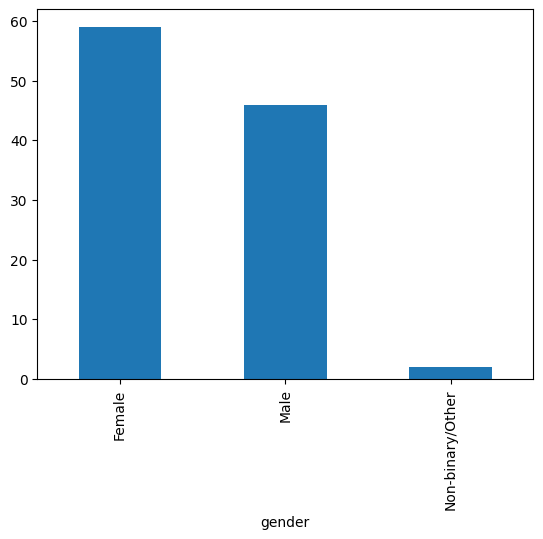

In [48]:
genderOccupation['Student'].plot.bar()
plt.show()

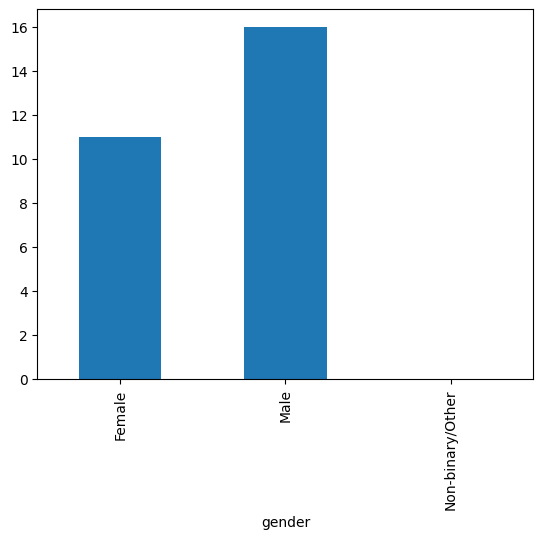

In [49]:
genderOccupation['Unemployed'].plot.bar()
plt.show()

Finally, we apply the chi-squared test since we are comparing two categorical variables against each other, and we look at the p-walue to determine if we reject of fail to reject the Null hypothesis.

In [50]:
from scipy.stats import chi2_contingency
stats = chi2_contingency(genderOccupation)
stats.pvalue

np.float64(0.021833119043229602)

**Our decision:** Sinc ethe p-value is 0.02 which is less than 0.05 (our level of significance), we reject the null hypothesis. This means that gender does have some sort of effect on occupation in our data.

## **5.   Primary Analysis**
We chose linear regression because it provides a function that best represents the relationship between the independent variables and the output variables. Since the mental wellness index is a continuous variable ranging from 0-100, linear regression helps with precision prediction while been providing easily interpretable results. The results show directly how mental illness wellness is affect by each independent variable.  This makes linear regression great for answering questions about the influence of different behaviors or demographics and for giving recommendations about what matters most for mental health.

### Preparation of Data Loaders

In [51]:
print("Preparing Data Loaders...")

data_curated = data_curated.drop(columns=['user_id'], errors='ignore')

X = data_curated.drop(columns=['mental_wellness_index_0_100', 'stress_level_0_10', 'productivity_0_100', 'sleep_quality_1_5'])
y = data_curated['mental_wellness_index_0_100']

print(X.shape)
print(y.shape)

Preparing Data Loaders...
(400, 16)
(400,)


### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

try:
    assert(type(model) == LinearRegression)
except:
    print('"model" must be LinearRegression type!')

### Predictions


In [53]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

expected = y_test.values[:4]
predicted = y_test_pred[:4]
error = expected - predicted

print(f'Expected: {expected}')
print(f'Predicted: {predicted}')
print(f'Error: {error}')

Expected: [ 0.  12.8  2.4  3.3]
Predicted: [ 5.93717162 21.33279009 15.82085634  8.08098285]
Error: [ -5.93717162  -8.53279009 -13.42085634  -4.78098285]


### Performance

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

msr_tr = mean_squared_error(y_train, y_train_pred)
mse_ts = mean_squared_error(y_test, y_test_pred)

r2_tr = r2_score(y_train, y_train_pred)
rmse_tr = np.sqrt(msr_tr)

r2_ts = r2_score(y_test, y_test_pred)
rmse_ts = np.sqrt(mse_ts)

print("R2 train", r2_tr)
print("RMSE train", rmse_tr)

print("\nR2 test", r2_ts)
print("RMSE test", rmse_ts)

R2 train 0.5874501363195571
RMSE train 13.1288364769362

R2 test 0.4593367258552089
RMSE test 14.623417301111786


## **6.   Visualization**
To help explain the findings of our analysis and our machine learning model, we developed two visualizations.  The conclusions we make later are supported by these plots, which clearly display the relationships in our data.

###Plot 1: Actual vs. Predicted Mental Wellness

This plot compares the mental wellness values predicted by our linear regression model to the actual values in the test set.

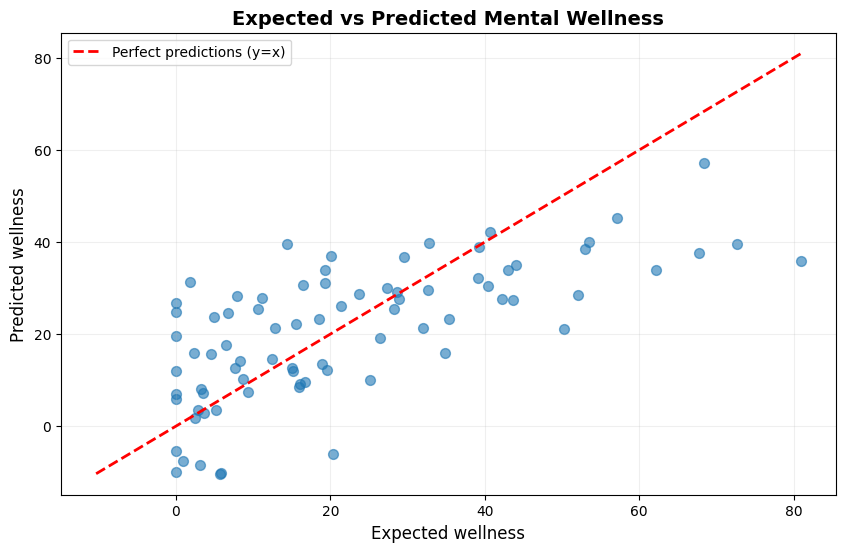

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, s=50)

min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
         label='Perfect predictions (y=x)')

plt.xlabel("Expected wellness", fontsize=12)
plt.ylabel("Predicted wellness", fontsize=12)
plt.title("Expected vs Predicted Mental Wellness", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Legend:

X-axis: Actual wellness values

Y-axis: Predicted wellness values

Title: Actual vs Predicted

Insights:

Most points fall close to a diagonal line, meaning the predictions are similar to the real values. This shows that the model is performing well and capturing important patterns in the data. The plot gives readers a simple visual way to see the accuracy of our model.

###Plot 2: Screen Time vs. Mental Wellness

This scatter plot shows how a user's total daily screen time relates to their mental wellness score.

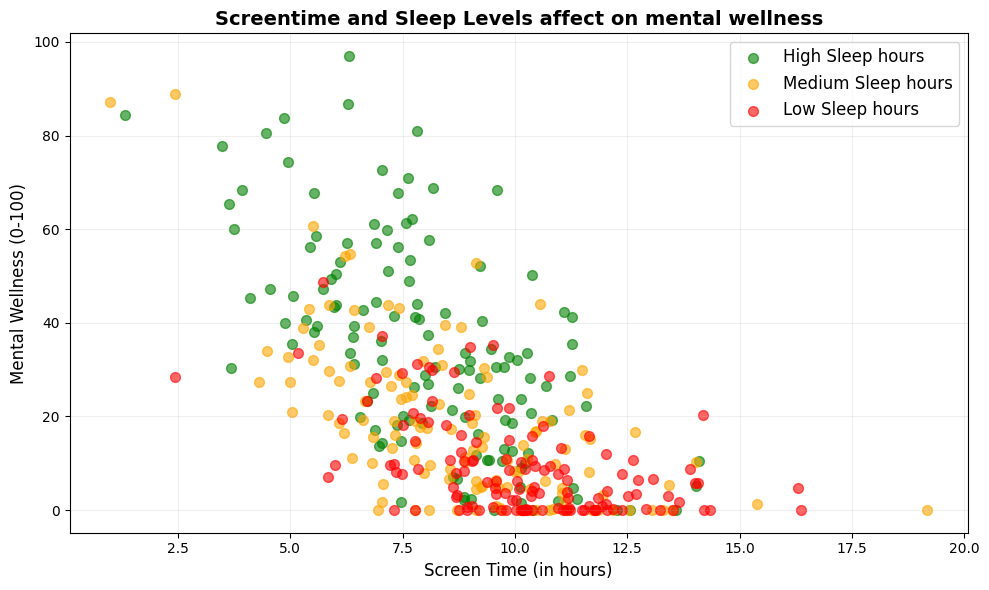

In [56]:
plot_data = data[['screen_time_hours', 'sleep_hours', 'mental_wellness_index_0_100']].copy()


plot_data['sleep_level'] = pd.qcut(plot_data['sleep_hours'],
                                   q=3,
                                   labels=['Low Sleep hours', 'Medium Sleep hours', 'High Sleep hours'])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sleep_colors = {
    'Low Sleep hours': 'red',
    'Medium Sleep hours': 'orange',
    'High Sleep hours': 'green'}

for level in ['High Sleep hours', 'Medium Sleep hours', 'Low Sleep hours']:
    subset = plot_data[plot_data['sleep_level'] == level].copy()
    if len(subset) > 0:
        ax.scatter(subset['screen_time_hours'], subset['mental_wellness_index_0_100'],
                  alpha=0.6, s=50, color=sleep_colors[level], label=level)


ax.set_xlabel('Screen Time (in hours)', fontsize=12)
ax.set_ylabel('Mental Wellness (0-100)', fontsize=12)
ax.set_title('Screentime and Sleep Levels affect on mental wellness', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Insights:

This plot is testing whether sleep acts as a way to help against the negative impact of screentime. Through this plot we can see that it helps to a certain extent. There is still a negative correlation between screen time and mental wellness (regardless of high levels of sleep)

###Plot 3: Impact of Different Choices on Wellness

This plot shows impact of different lifestyle choices on mental wellness

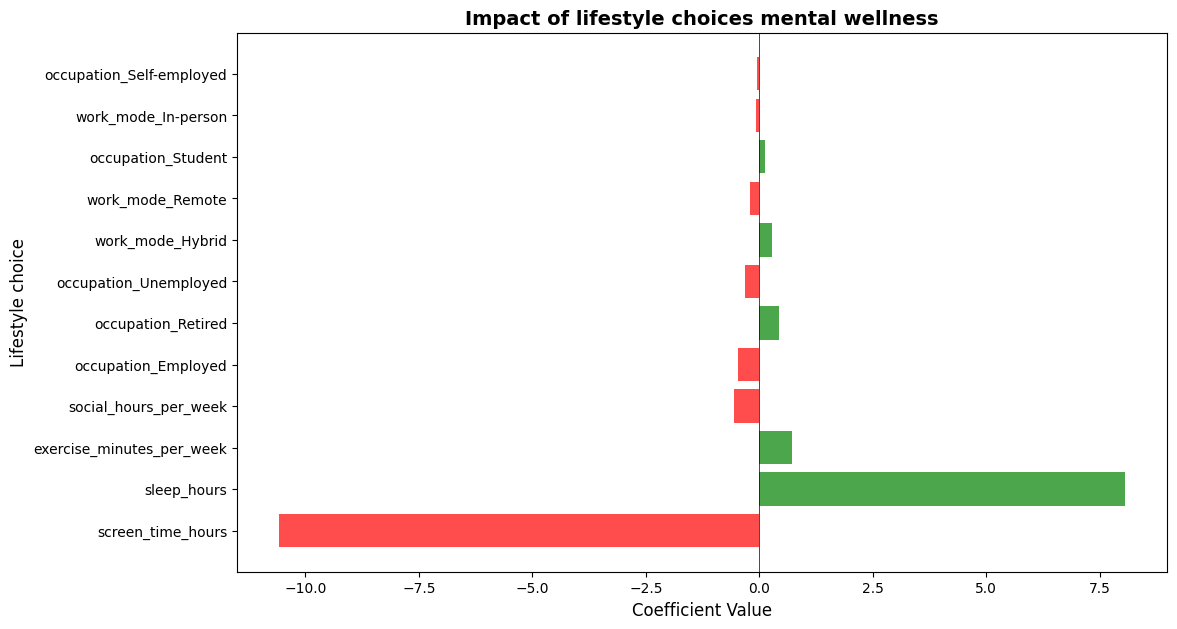


green shows an increase mental wellness
red shows a decrease in mental wellness
larger values indicate stronger impact


In [57]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

lifestylechoices = [
    'screen_time_hours',
    'sleep_hours',
    'exercise_minutes_per_week',
    'social_hours_per_week',
    'occupation_Employed',
    'occupation_Retired',
    'occupation_Self-employed',
    'occupation_Student',
    'occupation_Unemployed',
    'work_mode_Hybrid',
    'work_mode_In-person',
    'work_mode_Remote'
]

lifestyle_coefs = coef_df[coef_df['Feature'].isin(lifestylechoices)].copy()
# standardization of the coef values
# important since we're ranking different lifestyle choices against each other
standardized_coefs = []
for feature in lifestyle_coefs['Feature']:
    if feature in X_train.columns:
        std_dev = X_train[feature].std()
        raw_coef = lifestyle_coefs[lifestyle_coefs['Feature'] == feature]['Coefficient'].values[0]
        standardized_coef = raw_coef * std_dev
        standardized_coefs.append(standardized_coef)
    else:
        raw_coef = lifestyle_coefs[lifestyle_coefs['Feature'] == feature]['Coefficient'].values[0]
        standardized_coefs.append(raw_coef)

lifestyle_coefs['Standardized_Coefficient'] = standardized_coefs
lifestyle_coefs['Abs_Standardized_Coefficient'] = lifestyle_coefs['Standardized_Coefficient'].abs()
lifestyle_coefs = lifestyle_coefs.sort_values('Abs_Standardized_Coefficient', ascending=False)

plt.figure(figsize=(12, 7))
colors = ['red' if x < 0 else 'green' for x in lifestyle_coefs['Standardized_Coefficient']]
plt.barh(range(len(lifestyle_coefs)), lifestyle_coefs['Standardized_Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(lifestyle_coefs)), lifestyle_coefs['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Lifestyle choice', fontsize=12)
plt.title('Impact of lifestyle choices mental wellness',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.show()

print("\ngreen shows an increase mental wellness")
print("red shows a decrease in mental wellness")
print("larger values indicate stronger impact")


In [58]:
display(lifestyle_coefs)

,Feature,Coefficient,Standardized_Coefficient,Abs_Standardized_Coefficient
1,screen_time_hours,-4.202688,-10.571695,10.571695
2,sleep_hours,9.442746,8.052405,8.052405
3,exercise_minutes_per_week,0.010634,0.728747,0.728747
4,social_hours_per_week,-0.114592,-0.557206,0.557206
8,occupation_Employed,-0.923979,-0.460938,0.460938
9,occupation_Retired,2.161787,0.427448,0.427448
12,occupation_Unemployed,-1.315126,-0.318840,0.318840
13,work_mode_Hybrid,0.567174,0.275012,0.275012
15,work_mode_Remote,-0.422000,-0.203556,0.203556
11,occupation_Student,0.261994,0.115010,0.115010


Insights:

This plot is comparing various lifestyle choices and factors ranking their absolute value from smallest to largest to see which choices have greater impacts. As we can see from our dataset, being self-employed has the weakest impact on mental wellness while screen time hours has the strongest impact on mental wellness.

## **7.   Insights and Conclusions**
Our project's objective was to comprehend how lifestyle choices, particularly screen time, impact mental wellness and develop a model that can forecast wellness based on these variables.  To answer this quention accurately, we aimed to focus exclusively on actionable lifestyle choices rather than outcomes like stress level and productivity which were given in our dataset and were indicators of wellness rather than choices themselves.

Our model achieved a moderate performance (R² = 0.68 on test set, RMSE = 11.3 points) using only a few lifestyle choices, demogtraphics, and occupation/work mode. These findings clearly show which lifestyle choices within our dataset are most important and how they affect mental health.

###Insight #1: Screen Time is the strongest predictor among lifestyle choices.

Screen time and mental wellness had a moderately strong negative correlation, based on our correlation test (r = –0.636, p < 0.001). This implies that mental wellness scores tend to decline as daily screen time increases. This pattern was verified by both the correlation test and our linear regression model where screen time was the most negative predictor among all our lifestyle choices and factors.

To put this into perspective, for every additional hour of daily screentime, our model predicted a decrease in mental wellness of appx. 3-4 points (on a 0-100) scale, even after controlling factors like sleepm exercise, occupation, and workmode. This illustrates for new readers how extended screen time can be detrimental to health. The correlation value provides a quantifiable sense of this relationship's strength for readers with experience.

###Insight #2: Sleep and exercise are the strongest positive predictors for mental wellness

Both sleep hours and exercise shows positive coefficients in our model. This means that such choices led to an increase in predicted mental wellness. Those who slept more hours per night and exercised more minutes per week tended to have higher mental wellness scores. However, we should also note that sleep hours has a much higher coefficient than exericse meaning that exercise would likely not have a high effect on negating dips in mental wellness due to high screen time.

However, our model would suggest that increasing exercise increasing sleep by 1 hour can improve predicted mental wellness by several points. This aligns with standard health recommendations and research done on this topic and also establishes that the positive effects of sleep and exercise would be able to help mitigate the negative impacts of high screen time. These findings demonstrate how healthy behaviors can protect against the detrimental effects of stress and screen time for both laypeople and experts.

###Insight #3: Occupation Adds Additional Differences

Our one-way ANOVA test shows that there are notable variations in wellness between professions (p < 0.001). In the regression model, certain occupations continued to predict higher or lower wellness even after controlling for sleep, screen time, and stress.  This implies that factors other than personal habits may have an impact on mental health, such as the type of job and the workplace.

This suggest factors that extend beyond individual lifestyle choices such as job type, enviornment (remote/hybrid/in person) may impact mental wellness. For example different jobs might involve more stress through longer hours or less autonomy, while the work mode may affect social connection and work-life balance differently. And when we take into account the strong negative correlation with screen time and the nature of a majority of jobs currently and 37.50% of users in our dataset working remotely, we may be able to see a correlation as to why there is a decrease in mental wellness for people who are employed as shown in Plot 3.

###What New Readers Learn

A reader who is not familiar with mental wellness research finds out which behaviors are most important:
- Screen time reduce wellness and is one of the strongest negative predictors among lifestyle choices.
- Exercise and sleep increase it. Additionally, they observe that daily routines can be used to predict wellness, which makes the subject more relatable and intelligible.

This helps to make mental wellness more tangible by showing that everyday choices matter and can be quantified

###What Experienced Readers Learn

Readers with experience learn how strong each predictor is in comparison.
- They observe quantitative evidence of the effects of occupation, sleep, and screen time on wellness.
- They are able to gain examples of model specification, for example we deliberately excluded stress level and productivity to avoid circular reasoning, focusing meainly on actionable lifestyle choices a person could take which makes our model more honest.
- They are able to see feature importance in terms of effect on mental wellness as the coefficients among different lifestyles show meaningful differences between the categories.
- They are able to see model limitations in determining mental wellness. Although our model was moderately accurate, the 32% unexplained variance shows that lifestyle choices alone likely can't fully predict mental wellness. Other factors could definitely be at play such as genetics, life events, medical conditions and etc.

###Final Takeaway

Overall, our research demonstrates that screen time, daily routines, stress levels, and occupation type all have a significant impact on mental wellness. The high model accuracy, significant statistical tests, and strong correlations all show that wellness can be predicted from quantifiable daily behaviors. These results show which behaviors are most important and offer a straightforward, practical method to comprehend and predict mental wellness.